## MonteCarlo Projection of Player Stats

This notebook uses classical and quantum montecarlo methods to predict the end of year statistics for Football players. 

In [1]:
import pandas as pd
import numpy as np
from dimod import BinaryQuadraticModel
from dwave.system import LeapHybridSampler
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import cirq
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv('2018.csv')
df[['Player', 'TD%','G', 'TD', 'Att' ]].head()

,Player,TD%,G,TD,Att
0,Patrick Mahomes *+,8.6,16,50,580
1,Drew Brees*,6.5,15,32,489
2,Ben Roethlisberger,5.0,16,34,675
3,Mitchell Trubisky *,5.5,14,24,434
4,Jameis Winston,5.0,11,19,378


# Classical MonteCarlo

We populate a list 'iters' which contains all the iterations for one season. Here we draw the number of pass attempts from a random uniform distribution; and the td% (td rate) by a random normal distribution. By multiplying the tdrate by the number of attempts we get an estimate for the number of touchdowns thrown that season. A histogram is plotted of all the distributions.

In [3]:
iters = []

for i in range(400):
    td = np.random.normal(0.067, 0.025)*np.random.uniform(300,600)
    iters.append(td)

Average TD Projection for Mahomes: 30.377422101695828


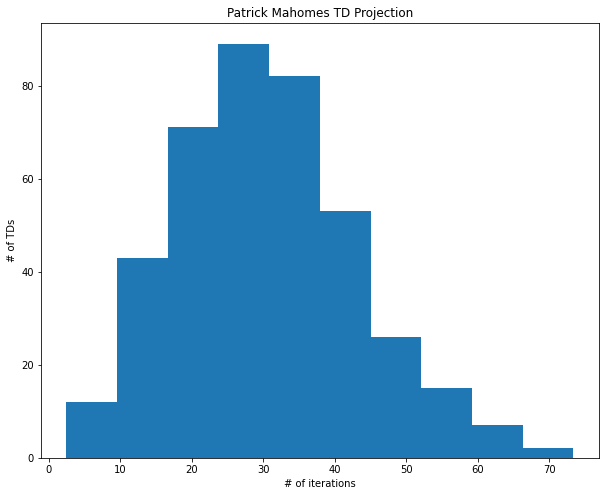

In [4]:
print('Average TD Projection for Mahomes: ' + str(np.mean(iters)))

plt.hist(iters)
plt.title('Patrick Mahomes TD Projection')
plt.ylabel('# of TDs')
plt.xlabel('# of iterations');

# Quantum MonteCarlo

For the quantum monte carlo simulation, we allow the measurement of the outcome to influence the strategy for simulation. This leads to a much more exotic histogram. Here, we are using the number of '1's in the measured state which is stored in the 'counts' variable in the iteration loop.

In [5]:
iters_q = []

qubit = cirq.GridQubit(0, 0)

circuit = cirq.Circuit(
    cirq.X(qubit)**0.5,  
    cirq.measure(qubit, key='m')  
)

for i in range(300):
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=10)
    result = str(result)
    counts = list(Counter(result).items())[2][1]
    
    if counts <= 4:
        td = np.random.normal(0.035, 0.015)*np.random.uniform(300,600)
        iters_q.append(td)
        
    elif (counts > 4) & (counts <= 7):
        td = np.random.normal(0.067, 0.025)*np.random.uniform(300,600)
        iters_q.append(td)
        
    elif counts > 7:
        td = np.random.normal(0.09, 0.015)*np.random.uniform(300,600)
        iters_q.append(td)
    
    

Average Quantum TD Projection for Mahomes: 27.485964848001647


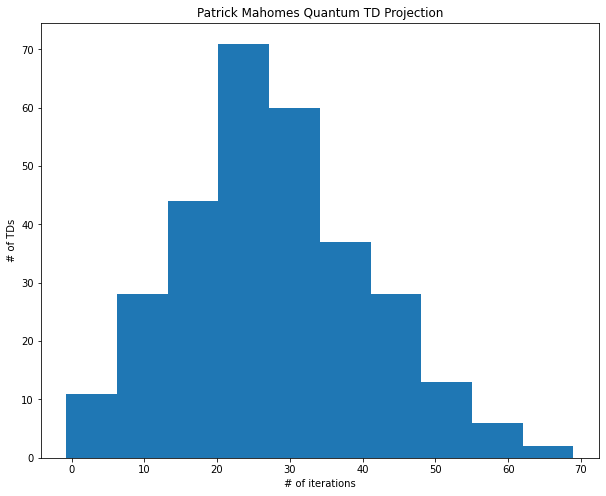

In [6]:
print('Average Quantum TD Projection for Mahomes: ' + str(np.mean(iters_q)))

plt.hist(iters_q)
plt.title('Patrick Mahomes Quantum TD Projection')
plt.ylabel('# of TDs')
plt.xlabel('# of iterations');